In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
caminho_salvar = 'df_limpo_final.csv'
df = pd.read_csv(caminho_salvar)

In [6]:
# Lista das colunas de sopro a serem excluídas
colunas_sopro_a_excluir = [
    'SOPRO_TRATADO_Ausente',
    'SOPRO_TRATADO_Contínuo',
    'SOPRO_TRATADO_Sistólico',
    'SOPRO_TRATADO_diastólico'
]

df.drop(columns=colunas_sopro_a_excluir, inplace=True)

# Imprimir as colunas restantes
print(df.columns)

Y = df['ANORMAL_COD']
X = df.drop(columns=['ANORMAL_COD'])


# Separação dos Dados
X_train, X_test, Y_train, Y_test = train_test_split(

    X, Y,

    test_size=0.3,      

    random_state=42,    
)


Index(['IMC', 'IDADE', 'FC', 'ANORMAL_COD', 'SEXO_TRATADO_F',
       'SEXO_TRATADO_Indeterminado', 'SEXO_TRATADO_M', 'B2_Desdob fixo',
       'B2_Hiperfonética', 'B2_Normal', 'B2_Outro', 'B2_Única',
       'classificacao_imc_Abaixo do peso', 'classificacao_imc_Desconhecido',
       'classificacao_imc_Obesidade'],
      dtype='object')



--- Iniciando Otimização de Hiperparâmetros (GridSearch) ---


c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores parâmetros Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated cla

Melhores parâmetros Regressão Logística: {'C': 0.01, 'solver': 'liblinear'}

--- Estimativa de Erro de Generalização (Cross-Validation) ---
[Random Forest Otimizado] Acurácia Média CV: 0.6185 (+/- 0.0071)
[Reg. Logística Otimizada] Acurácia Média CV: 0.6620 (+/- 0.0082)

--- Métricas Detalhadas no Conjunto de Teste ---

>> Relatório para: Random Forest
              precision    recall  f1-score   support

           0       0.54      0.45      0.49      1211
           1       0.00      0.00      0.00         1
           2       0.65      0.72      0.68      1694

    accuracy                           0.61      2906
   macro avg       0.40      0.39      0.39      2906
weighted avg       0.60      0.61      0.60      2906



c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\livia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-

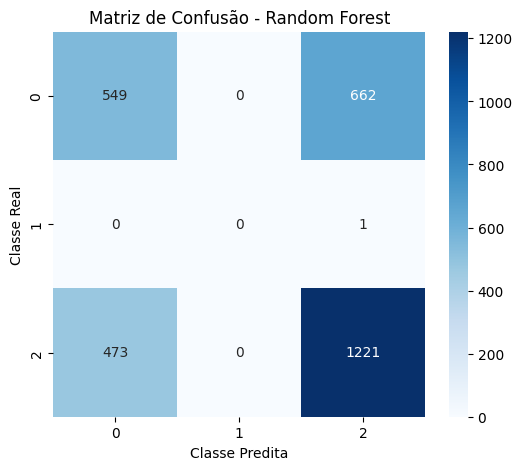


>> Relatório para: Regressão Logística
              precision    recall  f1-score   support

           0       0.65      0.31      0.42      1211
           1       0.00      0.00      0.00         1
           2       0.64      0.88      0.74      1694

    accuracy                           0.64      2906
   macro avg       0.43      0.40      0.39      2906
weighted avg       0.64      0.64      0.61      2906



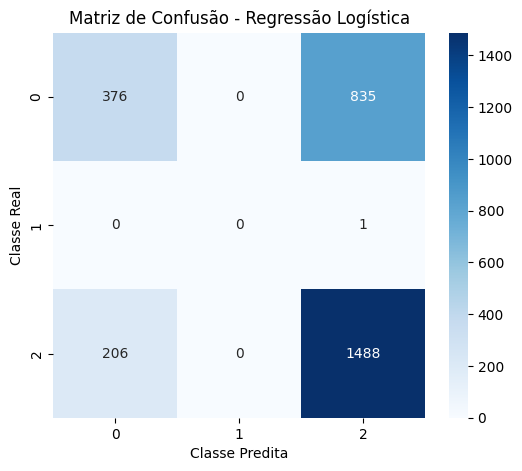


--- Comparação Final entre Modelos ---
             Modelo  Acurácia  Precisão   Recall  F1-Score  AUC-ROC
      Random Forest  0.609085  0.601648 0.609085  0.602763 0.552468
Regressão Logística  0.641432  0.642461 0.641432  0.606536 0.544986

--- Interpretação de Modelos (Feature Importance) ---


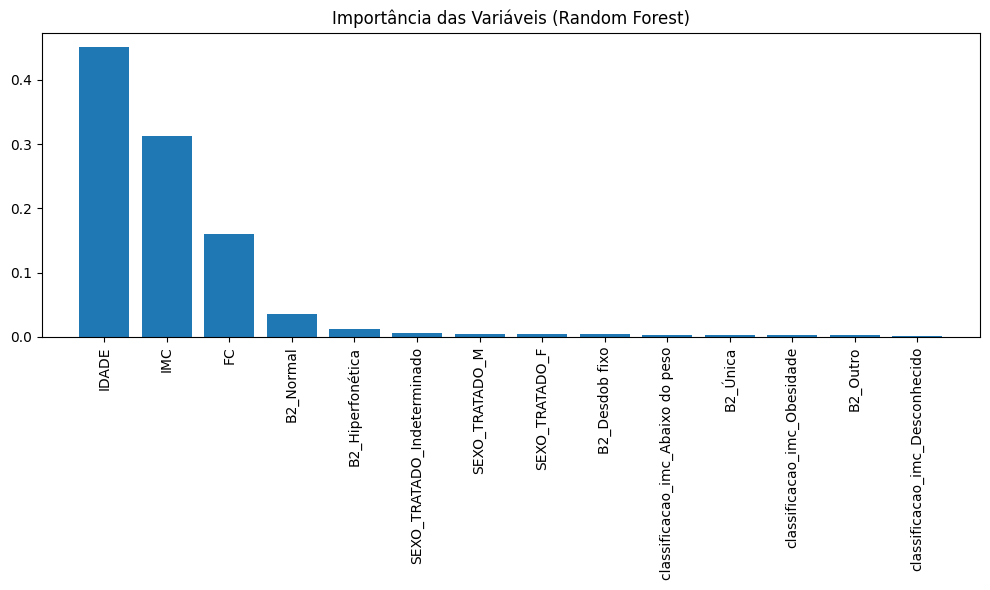


Top 5 Variáveis mais importantes:
1. IDADE (0.4506)
2. IMC (0.3126)
3. FC (0.1601)
4. B2_Normal (0.0351)
5. B2_Hiperfonética (0.0115)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importando TODAS as métricas necessárias
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# ==============================================================================
# 1. SELEÇÃO DE MODELOS E OTIMIZAÇÃO DE HIPERPARÂMETROS (GridSearchCV)
# ==============================================================================
print("\n--- Iniciando Otimização de Hiperparâmetros (GridSearch) ---")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# A. Otimização Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       cv=cv,
                       scoring='f1',
                       n_jobs=-1)

grid_rf.fit(X_train, Y_train)
best_rf = grid_rf.best_estimator_

print(f"Melhores parâmetros Random Forest: {grid_rf.best_params_}")

# B. Otimização Regressão Logística
param_grid_rl = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_rl = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                       param_grid=param_grid_rl,
                       cv=cv,
                       scoring='f1',
                       n_jobs=-1)

grid_rl.fit(X_train, Y_train)
best_rl = grid_rl.best_estimator_

print(f"Melhores parâmetros Regressão Logística: {grid_rl.best_params_}")

# ==============================================================================
# 2. ESTIMATIVA DO ERRO DE GENERALIZAÇÃO (Validação Cruzada)
# ==============================================================================
print("\n--- Estimativa de Erro de Generalização (Cross-Validation) ---")

def avaliar_generalizacao(modelo, X, y, nome):
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
    print(f"[{nome}] Acurácia Média CV: {scores.mean():.4f} (+/- {scores.std():.4f})")
    return scores.mean()

acc_cv_rf = avaliar_generalizacao(best_rf, X_train, Y_train, "Random Forest Otimizado")
acc_cv_rl = avaliar_generalizacao(best_rl, X_train, Y_train, "Reg. Logística Otimizada")

# ==============================================================================
# 3. COMPARAÇÃO E MÉTRICAS DETALHADAS (Teste Final)
# ==============================================================================
print("\n--- Métricas Detalhadas no Conjunto de Teste ---")

modelos = {'Random Forest': best_rf, 'Regressão Logística': best_rl}
resultados = []

for nome, modelo in modelos.items():
    Y_pred = modelo.predict(X_test)
    
    # Cálculo do ROC AUC para Multiclasse
    try:
        # Pega probabilidade de todas as classes
        Y_prob = modelo.predict_proba(X_test) 
        # multi_class='ovr' (One-vs-Rest) é necessário para >2 classes
        roc = roc_auc_score(Y_test, Y_prob, multi_class='ovr', average='weighted')
    except Exception as e:
        roc = 0 # Caso o modelo não suporte ou ocorra erro específico
        print(f"Aviso: Não foi possível calcular ROC para {nome}. Erro: {e}")

    # Métricas com average='weighted' para suportar múltiplas classes
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0)
    rec = recall_score(Y_test, Y_pred, average='weighted', zero_division=0)
    f1 = f1_score(Y_test, Y_pred, average='weighted', zero_division=0)

    resultados.append({
        'Modelo': nome,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC-ROC': roc
    })

    print(f"\n>> Relatório para: {nome}")
    print(classification_report(Y_test, Y_pred, zero_division=0))
    
    # Matriz de Confusão Visual
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    plt.show()

# Tabela Comparativa Final
df_comparacao = pd.DataFrame(resultados)
print("\n--- Comparação Final entre Modelos ---")
# Exibe a tabela formatada
print(df_comparacao.to_string(index=False))

# ==============================================================================
# 4. INTERPRETAÇÃO DOS MODELOS (Feature Importance)
# ==============================================================================
print("\n--- Interpretação de Modelos (Feature Importance) ---")

if hasattr(best_rf, 'feature_importances_'):
    importancias = best_rf.feature_importances_
    features = X.columns
    indices = np.argsort(importancias)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Importância das Variáveis (Random Forest)")
    plt.bar(range(X.shape[1]), importancias[indices], align="center")
    plt.xticks(range(X.shape[1]), features[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

    print("\nTop 5 Variáveis mais importantes:")
    for i in range(5):
        if i < len(features):
            print(f"{i+1}. {features[indices[i]]} ({importancias[indices[i]]:.4f})")
else:
    print("O modelo selecionado não suporta feature_importances_ direto.")